<a href="https://colab.research.google.com/github/paascorb/RompecabezasPCD/blob/main/TrabajoPCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Rompecabezas por Pablo Ascorbe

In [4]:
pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.1 MB/s 


In [157]:
import numpy as np
import matplotlib.pylab as plt
import random
import pygame

Primero necesitamos un método que divida una imagen en las filas y columnas deseadas:

In [165]:
def dividir_imagen(imagen, filas, columnas):
  res = dividir_columnas( dividir_filas(imagen, filas), columnas)
  return [item for sublist in res for item in sublist]

In [166]:
def dividir_filas(imagen, filas):
  #Guardamos la dimension de las filas y calculamos el resto
  shape_0 = imagen.shape[0]
  restoFilas = shape_0%filas
  #Si la división no es exacta, significa que necesitamos rellenar con píxeles
  #negros, a través de la diferencia entre el resto y el número de filas.
  if restoFilas != 0:
    dif = filas - restoFilas
    shape_0 += dif
    #Si además esa diferencia no es par, necesitamos añadirle a una porción
    #más negros que a otra
    if dif%2 != 0:
      arriba = dif//2
      abajo = dif-arriba
    else:
      arriba, abajo = dif//2, dif//2
    #Con esto resuelto creamos las filas de negros, añadimos la imagen y 
    #terminamos de rellenar con negros.
    res = np.zeros((arriba, imagen.shape[1], imagen.shape[2]), dtype=int)
    res = np.append(res, np.copy(imagen), axis=0)
    res = np.append(res, np.zeros((abajo, imagen.shape[1], imagen.shape[2]), dtype=int), axis=0)
  else:
    res = np.copy(imagen)
  #Calculamos cuantas filas entran en cada porción
  cocienteFilas = shape_0//filas
  #comprobamos si tiene sentido rebanar
  if cocienteFilas == shape_0:
    return res
  else:
    #Y rebanamos
    return np.split(res, list(range(cocienteFilas, (cocienteFilas*filas)+1, cocienteFilas)))[:-1]

In [167]:
#El funcionamiento es identico a filas, pero en este caso es ir aplicándolo 
#por columnas a cada elemento de nuestra lista de filas.
def dividir_columnas(listaFilas, columnas):
  shape_1 = listaFilas[0].shape[1]
  restoColumnas = shape_1%columnas
  if restoColumnas != 0:
    dif = columnas - restoColumnas
    shape_1 += dif
    if dif%2 != 0:
      arriba = dif//2
      abajo = dif-arriba
    else:
      arriba, abajo = dif//2, dif//2
    aux = []
    for elem in listaFilas:
      res = np.zeros((elem.shape[0], arriba, elem.shape[2]), dtype=int)
      res = np.append(res, np.copy(elem), axis=1)
      aux.append(np.append(res, np.zeros((elem.shape[0], arriba, elem.shape[2]), dtype=int), axis=1))
    listaFilas = aux
  cocienteColumnas = shape_1//columnas
  if cocienteColumnas == shape_1:
    return listaFilas
  else:
    return [np.split(listaFilas[i], list(range(cocienteColumnas, (cocienteColumnas*columnas)+1, cocienteColumnas)), axis=1)[:-1] for i in range(len(listaFilas))]

In [195]:
import skimage

lista = dividir_imagen(skimage.data.coffee(), 10, 10)

Creamos una función auxiliar para mostrar los resultados:

In [196]:
def mostrar_casillas(lista, filas, columnas):
  fig = plt.figure(figsize=(8, 8))
  for i in range(0, filas*columnas):
    fig.add_subplot(filas,columnas,i+1)
    plt.imshow(lista[i])
  plt.show()

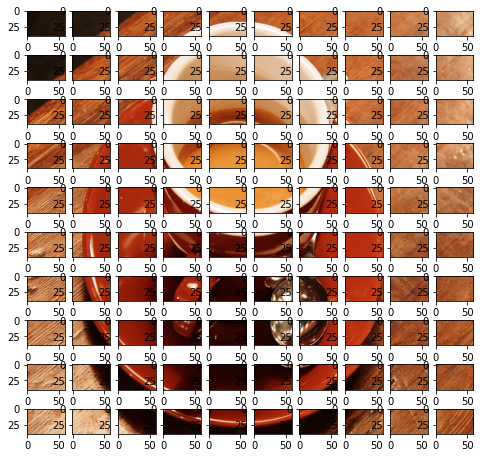

In [197]:
#Vemos que funciona correctamente:
mostrar_casillas(lista, 10, 10)

Ahora necesitamos un método que desordene nuestrás imágenes para el rompecabezas:

In [198]:
def desordenar_imagenes(listaImagenes):
  return random.shuffle(listaImagenes)

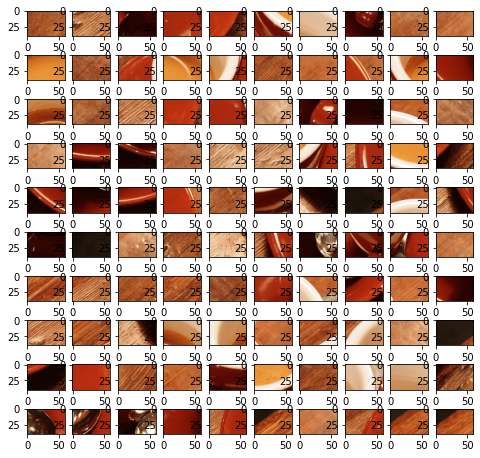

In [199]:
desordenar_imagenes(lista)
mostrar_casillas(lista, 10, 10)

Necesitamos crear el hueco con el que iremos jugando:

In [200]:
def crear_hueco(lista):
  elem = random.choice(lista)
  ind = next((i for i, val in enumerate(lista) if np.all(val == elem)), -1)
  elem.fill(0)
  lista[ind] = elem
  return lista

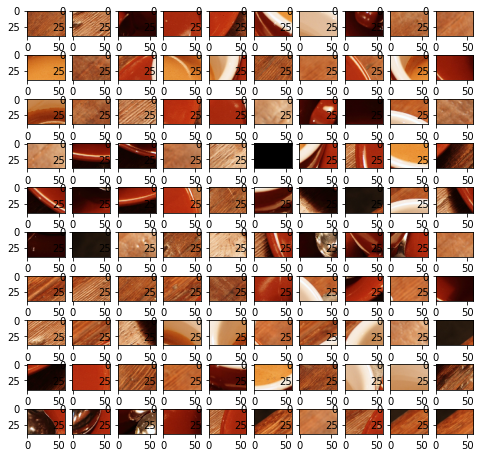

In [201]:
lista = crear_hueco(lista)
mostrar_casillas(lista, 10, 10)

Implementamos que el usuario pueda escoger cualquier imagen: